# CME538 - Introduction to Data Science 
## Project 2 - Toronto Bike Share 
## Nonamegroup3 - Samir Alhasan, Abdulah Al-Jalaad and Emil Hagaseth

### Setup Notebook

In [1]:
# Import 3rd party libraries
import os
import pandas as pd
import seaborn as sns
import matplotlib.pylab as plt
import pytz

# Configure Notebook
%matplotlib inline
plt.style.use('fivethirtyeight')
sns.set_context("notebook")
import warnings
warnings.filterwarnings('ignore')

### Weather Data Import

In [2]:
# Set weather data path
path_weather = os.path.join(os.path.abspath(os.getcwd()), 'data', 'weather')

# Get weather file names
weather_filenames = [filename for filename in os.listdir(path_weather) if 'climate' in filename]

# Print file names
print(weather_filenames[0:5])

['en_climate_hourly_ON_6158359_01-2017_P1H.csv', 'en_climate_hourly_ON_6158359_01-2018_P1H.csv', 'en_climate_hourly_ON_6158359_01-2019_P1H.csv', 'en_climate_hourly_ON_6158359_01-2020_P1H.csv', 'en_climate_hourly_ON_6158359_01-2021_P1H.csv']


### Bike Share Trip Data Import

In [3]:
# Set bikeshare data path
path_ridership = os.path.join(os.path.abspath(os.getcwd()), 'data', 'ridership')

# Create a list of file names for bike share trips data
trips_filenames = [filename for filename in os.listdir(os.path.join(path_ridership, 'release')) if 'bike_share' in filename]

# Create a dictionary where key:value pairs correspond to the file name and DataFrame respectively
trips_data = {filename: pd.read_csv(os.path.join(path_ridership, 'release', filename)) for filename in trips_filenames}  

# Now lets print out the column names for the first month of each year
print('2017\n{}\n'.format(trips_data['bike_share_2017-1.csv'].columns.tolist()))
print('2018\n{}\n'.format(trips_data['bike_share_2018-1.csv'].columns.tolist()))
print('2019\n{}\n'.format(trips_data['bike_share_2019-1.csv'].columns.tolist()))
print('2020\n{}\n'.format(trips_data['bike_share_2020-1.csv'].columns.tolist()))
print('2021\n{}\n'.format(trips_data['bike_share_2021-1.csv'].columns.tolist()))
print('2022\n{}\n'.format(trips_data['bike_share_2022-1.csv'].columns.tolist()))

2017
['trip_id', 'trip_start_time', 'trip_stop_time', 'trip_duration_seconds', 'from_station_id', 'from_station_name', 'to_station_id', 'to_station_name', 'user_type']

2018
['trip_id', 'trip_duration_seconds', 'from_station_id', 'trip_start_time', 'from_station_name', 'trip_stop_time', 'to_station_id', 'to_station_name', 'user_type']

2019
['Trip Id', 'Subscription Id', 'Trip  Duration', 'Start Station Id', 'Start Time', 'Start Station Name', 'End Station Id', 'End Time', 'End Station Name', 'Bike Id', 'User Type']

2020
['Trip Id', 'Subscription Id', 'Trip  Duration', 'Start Station Id', 'Start Time', 'Start Station Name', 'End Station Id', 'End Time', 'End Station Name', 'Bike Id', 'User Type']

2021
['Trip Id', 'Trip  Duration', 'Start Station Id', 'Start Time', 'Start Station Name', 'End Station Id', 'End Time', 'End Station Name', 'Bike Id', 'User Type']

2022
['Trip Id', 'Trip  Duration', 'Start Station Id', 'Start Time', 'Start Station Name', 'End Station Id', 'End Time', 'End 

### Station Data Import

In [4]:
# Set stations data path
path_ridership = os.path.join(os.path.abspath(os.getcwd()), 'data', 'stations')

# Import stations
stations = pd.read_csv(os.path.join(path_ridership, 'bikeshare_stations.csv'))

# View DataFrame
stations.head()

,station_id,name,lat,lon
0,7000,Fort York Blvd / Capreol Ct,43.639832,-79.395954
1,7001,Wellesley Station Green P,43.664964,-79.383550
2,7002,St. George St / Bloor St W,43.667333,-79.399429
3,7003,Madison Ave / Bloor St W,43.667158,-79.402761
4,7004,University Ave / Elm St,43.656518,-79.389099


### Data Cleanup

In [5]:
# Create DataFrame containing monthly weather data from all files.
path_weather = os.path.join(os.path.abspath(os.getcwd()), 'data', 'weather')
weather_filenames = [filename for filename in os.listdir(os.path.join(path_weather))]
weather_filenames = weather_filenames[0:-1]
weather_data = []

for i in weather_filenames:
    x = pd.read_csv(os.path.join(path_weather, i))
    weather_data.append(x)

weather_data = pd.concat(weather_data, axis =0)
# View DataFrame
weather_data.head()

,Longitude (x),Latitude (y),Station Name,Climate ID,Date/Time,Year,Month,Day,Time,Temp (°C),...,Stn Press Flag,Hmdx,Hmdx Flag,Wind Chill,Wind Chill Flag,Weather,Date/Time (LST),Time (LST),Precip. Amount (mm),Precip. Amount Flag
0,-79.4,43.63,TORONTO CITY CENTRE,6158359,2017-01-01 00:00,2017,1,1,00:00,1.5,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,-79.4,43.63,TORONTO CITY CENTRE,6158359,2017-01-01 01:00,2017,1,1,01:00,1.5,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,-79.4,43.63,TORONTO CITY CENTRE,6158359,2017-01-01 02:00,2017,1,1,02:00,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,-79.4,43.63,TORONTO CITY CENTRE,6158359,2017-01-01 03:00,2017,1,1,03:00,1.2,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,-79.4,43.63,TORONTO CITY CENTRE,6158359,2017-01-01 04:00,2017,1,1,04:00,1.3,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [6]:
#Set date time as the index to weather data
weather_data = weather_data.set_index('Date/Time')
weather_data.index = pd.DatetimeIndex(weather_data.index)
# View DataFrame
weather_data.head()

,Longitude (x),Latitude (y),Station Name,Climate ID,Year,Month,Day,Time,Temp (°C),Temp Flag,...,Stn Press Flag,Hmdx,Hmdx Flag,Wind Chill,Wind Chill Flag,Weather,Date/Time (LST),Time (LST),Precip. Amount (mm),Precip. Amount Flag
Date/Time,,,,,,,,,,,,,,,,,,,,,
2017-01-01 00:00:00,-79.4,43.63,TORONTO CITY CENTRE,6158359,2017,1,1,00:00,1.5,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2017-01-01 01:00:00,-79.4,43.63,TORONTO CITY CENTRE,6158359,2017,1,1,01:00,1.5,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2017-01-01 02:00:00,-79.4,43.63,TORONTO CITY CENTRE,6158359,2017,1,1,02:00,1.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2017-01-01 03:00:00,-79.4,43.63,TORONTO CITY CENTRE,6158359,2017,1,1,03:00,1.2,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2017-01-01 04:00:00,-79.4,43.63,TORONTO CITY CENTRE,6158359,2017,1,1,04:00,1.3,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [7]:
#localize the data to a canada eastern time zone
import pytz
time_zone = pytz.timezone('EST')
EST_timezone = []
for row in range(weather_data.shape[0]):
     EST_timezone.append(time_zone.localize(weather_data.index[row]))
weather_data['Date/Time'] = EST_timezone
weather_data = weather_data.set_index('Date/Time', drop = True)
# View DataFrame
weather_data.head()

,Longitude (x),Latitude (y),Station Name,Climate ID,Year,Month,Day,Time,Temp (°C),Temp Flag,...,Stn Press Flag,Hmdx,Hmdx Flag,Wind Chill,Wind Chill Flag,Weather,Date/Time (LST),Time (LST),Precip. Amount (mm),Precip. Amount Flag
Date/Time,,,,,,,,,,,,,,,,,,,,,
2017-01-01 00:00:00-05:00,-79.4,43.63,TORONTO CITY CENTRE,6158359,2017,1,1,00:00,1.5,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2017-01-01 01:00:00-05:00,-79.4,43.63,TORONTO CITY CENTRE,6158359,2017,1,1,01:00,1.5,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2017-01-01 02:00:00-05:00,-79.4,43.63,TORONTO CITY CENTRE,6158359,2017,1,1,02:00,1.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2017-01-01 03:00:00-05:00,-79.4,43.63,TORONTO CITY CENTRE,6158359,2017,1,1,03:00,1.2,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2017-01-01 04:00:00-05:00,-79.4,43.63,TORONTO CITY CENTRE,6158359,2017,1,1,04:00,1.3,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [8]:
#Drop all columns except index, temp and weather
weather_data_clean = weather_data.loc[:,['Weather','Temp (°C)']]
weather_data_clean

,Weather,Temp (°C)
Date/Time,,
2017-01-01 00:00:00-05:00,NaN,1.5
2017-01-01 01:00:00-05:00,NaN,1.5
2017-01-01 02:00:00-05:00,NaN,1.0
2017-01-01 03:00:00-05:00,NaN,1.2
2017-01-01 04:00:00-05:00,NaN,1.3
...,...,...
NaT,Fog,4.3
NaT,Fog,4.4
NaT,Fog,4.0


In [ ]:
#Read all bike data
path_ridership = os.path.join(os.path.abspath(os.getcwd()), 'data', 'ridership','release')
trips_filenames = [filename for filename in os.listdir(os.path.join(path_ridership))]
trips_filenames = trips_filenames[0:-1]
trips_2017_data = []
trips_2018_data = []
trips_2019_data = []
trips_2020_data = []
trips_2021_data = []
trips_2022_data = []

for i in trips_filenames:
    if '2017' in i:
        trips_2017 = pd.read_csv(os.path.join(path_ridership, i))
        trips_2017_data.append(trips_2017)
    if '2018' in i:
        trips_2018 = pd.read_csv(os.path.join(path_ridership, i))
        trips_2018_data.append(trips_2018)
    if '2019' in i:
        trips_2019 = pd.read_csv(os.path.join(path_ridership, i))
        trips_2019_data.append(trips_2019)
    if '2020' in i:
        trips_2020 = pd.read_csv(os.path.join(path_ridership, i))
        trips_2020_data.append(trips_2020)
    if '2021' in i:
        trips_2021 = pd.read_csv(os.path.join(path_ridership, i))
        trips_2021_data.append(trips_2021)
    if '2022' in i:
        trips_2022 = pd.read_csv(os.path.join(path_ridership, i))
        trips_2022_data.append(trips_2022)

# View Data
trips_2022_data


In [10]:
#Create a dataframe from trips data
trips_2017_df = pd.concat(trips_2017_data, axis =0)
trips_2018_df = pd.concat(trips_2018_data, axis =0)
trips_2019_df = pd.concat(trips_2019_data, axis =0)
trips_2020_df = pd.concat(trips_2020_data, axis =0)
trips_2021_df = pd.concat(trips_2021_data, axis =0)
trips_2022_df = pd.concat(trips_2022_data, axis =0)

In [11]:
# Remove double spaces from the column names
trips_2017_df.columns = [' '.join(col.split()) for col in trips_2017_df.columns]
trips_2019_df.columns = [' '.join(col.split()) for col in trips_2019_df.columns]
trips_2020_df.columns = [' '.join(col.split()) for col in trips_2020_df.columns]
trips_2021_df.columns = [' '.join(col.split()) for col in trips_2021_df.columns]
trips_2022_df.columns = [' '.join(col.split()) for col in trips_2022_df.columns]
trips_2018_df.columns = [' '.join(col.split()) for col in trips_2018_df.columns]
# View DataFrame
trips_2018_df.head()

,trip_id,trip_duration_seconds,from_station_id,trip_start_time,from_station_name,trip_stop_time,to_station_id,to_station_name,user_type
0,2383648,393,7018,2018-01-01 05:47 (UTC),Bremner Blvd / Rees St,2018-01-01 05:54 (UTC),7176,Bathurst St / Fort York Blvd,Annual Member
1,2383649,625,7184,2018-01-01 05:52 (UTC),Ossington Ave / College St,2018-01-01 06:03 (UTC),7191,Central Tech (Harbord St),Annual Member
2,2383650,233,7235,2018-01-01 05:55 (UTC),Bay St / College St (West Side) - SMART,2018-01-01 05:59 (UTC),7021,Bay St / Albert St,Annual Member
3,2383651,1138,7202,2018-01-01 05:57 (UTC),Queen St W / York St (City Hall),2018-01-01 06:16 (UTC),7020,Phoebe St / Spadina Ave,Annual Member
4,2383652,703,7004,2018-01-01 06:00 (UTC),University Ave / Elm St,2018-01-01 06:12 (UTC),7060,Princess St / Adelaide St E,Annual Member


In [12]:
#Unify name of important columns, drop unnecessary columns
trips_2017_df = trips_2017_df.drop(['trip_id','from_station_id','to_station_id'],axis=1)
trips_2017_df.columns = ['start time', 'stop time', 'trip_duration','start station','stop station', 'user type']


trips_2018_df = trips_2018_df.drop(['trip_id','from_station_id','to_station_id'],axis=1)
trips_2018_df.columns = ['trip_duration','start time','start station', 'stop time','stop station', 'user type']
trips_2018_df = trips_2018_df.reindex(columns=['start time', 'stop time', 'trip_duration','start station','stop station', 'user type'])

trips_2019_df = trips_2019_df.drop(['Trip Id','Subscription Id','Start Station Id','End Station Id', 'Bike Id'],axis=1)
trips_2019_df.columns = ['trip_duration','start time','start station', 'stop time','stop station', 'user type']
trips_2019_df = trips_2019_df.reindex(columns=['start time', 'stop time', 'trip_duration','start station','stop station', 'user type'])

trips_2020_df = trips_2020_df.drop(['Trip Id','Subscription Id','Start Station Id','End Station Id', 'Bike Id'],axis=1)
trips_2020_df.columns = ['trip_duration','start time','start station', 'stop time','stop station', 'user type']
trips_2020_df = trips_2020_df.reindex(columns=['start time', 'stop time', 'trip_duration','start station','stop station', 'user type'])

trips_2021_df = trips_2021_df.drop(['Trip Id','ï»¿Trip Id','Start Station Id','End Station Id', 'Bike Id'],axis=1)
trips_2021_df.columns = ['trip_duration','start time','start station', 'stop time','stop station', 'user type']
trips_2021_df = trips_2021_df.reindex(columns=['start time', 'stop time', 'trip_duration','start station','stop station', 'user type'])

trips_2022_df = trips_2022_df.drop(['Trip Id','Start Station Id','End Station Id', 'Bike Id'],axis=1)
trips_2022_df.columns = ['trip_duration','start time','start station', 'stop time','stop station', 'user type']
trips_2022_df = trips_2022_df.reindex(columns=['start time', 'stop time', 'trip_duration','start station','stop station', 'user type'])

trips_2017_df

,start time,stop time,trip_duration,start station,stop station,user type
0,2017-01-01 05:03 (UTC),2017-01-01 05:08 (UTC),274,Bay St / College St (East Side),Bay St / Albert St,Member
1,2017-01-01 05:03 (UTC),2017-01-01 05:12 (UTC),538,Niagara St / Richmond St W,King St W / Fraser Ave,Member
2,2017-01-01 05:05 (UTC),2017-01-01 05:22 (UTC),992,Front St / Yonge St (Hockey Hall of Fame),Church St / Wood St,Member
3,2017-01-01 05:09 (UTC),2017-01-01 05:26 (UTC),1005,East Liberty St / Pirandello St,Queen St W / York St (City Hall),Member
4,2017-01-01 05:14 (UTC),2017-01-01 05:25 (UTC),645,Bathurst St / Queens Quay W,King St W / Spadina Ave,Member
...,...,...,...,...,...,...
226401,2017-10-01 04:59 (UTC),2017-10-01 05:04 (UTC),337,Jarvis St / Isabella St,Yonge St / Yorkville Ave,Member
226402,2017-10-01 04:59 (UTC),2017-10-01 05:07 (UTC),494,Dundonald St / Church St,Victoria St / Gould St (Ryerson University),Member
226403,2017-10-01 04:59 (UTC),2017-10-01 05:18 (UTC),1114,Baldwin Ave / Spadina Ave - SMART,Hanna Ave / Liberty St,Member
226404,2017-10-01 04:59 (UTC),2017-10-01 05:19 (UTC),1192,Queens Quay W / Lower Simcoe St,Exhibition GO Station,Casual


In [13]:
#replace UTC and EST to blank and convert UTC timming to EST
dt_trips_2018_df=trips_2018_df
dt_trips_2018_df['start time'] = dt_trips_2018_df['start time'].str.replace('UTC','',regex = True)
dt_trips_2018_df['stop time'] = dt_trips_2018_df['stop time'].str.replace('UTC','',regex = True)
dt_trips_2018_df['start time'] = dt_trips_2018_df['start time'].str.replace('(','',regex = True)
dt_trips_2018_df['stop time'] = dt_trips_2018_df['stop time'].str.replace('(','',regex = True)
dt_trips_2018_df['start time'] = dt_trips_2018_df['start time'].str.replace(')','',regex = True)
dt_trips_2018_df['stop time'] = dt_trips_2018_df['stop time'].str.replace(')','',regex = True)
dt_trips_2018_df['start time']  = pd.DatetimeIndex(dt_trips_2018_df['start time'] )
dt_trips_2018_df['stop time'] = pd.DatetimeIndex(dt_trips_2018_df['stop time'])
dt_trips_2018_df['start time']  = dt_trips_2018_df['start time']-pd.Timedelta(5, unit = 'hr')
dt_trips_2018_df['stop time'] = dt_trips_2018_df['stop time']-pd.Timedelta(5, unit = 'hr')


In [14]:
dt_trips_2017_df=trips_2017_df
dt_trips_2017_df['start time'] = dt_trips_2017_df['start time'].str.replace('UTC','',regex = True)
dt_trips_2017_df['stop time'] = dt_trips_2017_df['stop time'].str.replace('UTC','',regex = True)
dt_trips_2017_df['start time'] = dt_trips_2017_df['start time'].str.replace('(','',regex = True)
dt_trips_2017_df['stop time'] = dt_trips_2017_df['stop time'].str.replace('(','',regex = True)
dt_trips_2017_df['start time'] = dt_trips_2017_df['start time'].str.replace(')','',regex = True)
dt_trips_2017_df['stop time'] = dt_trips_2017_df['stop time'].str.replace(')','',regex = True)
dt_trips_2017_df['start time']  = pd.DatetimeIndex(dt_trips_2017_df['start time'] )
dt_trips_2017_df['stop time'] = pd.DatetimeIndex(dt_trips_2017_df['stop time'])
dt_trips_2017_df['start time']  = dt_trips_2017_df['start time']-pd.Timedelta(5, unit = 'hr')
dt_trips_2017_df['stop time'] = dt_trips_2017_df['stop time']-pd.Timedelta(5, unit = 'hr')

In [15]:
dt_trips_2019_df=trips_2019_df
dt_trips_2019_df['start time'] = dt_trips_2019_df['start time'].str.replace('EST','',regex = True)
dt_trips_2019_df['stop time'] = dt_trips_2019_df['stop time'].str.replace('EST','',regex = True)
dt_trips_2019_df['start time'] = dt_trips_2019_df['start time'].str.replace('(','',regex = True)
dt_trips_2019_df['stop time'] = dt_trips_2019_df['stop time'].str.replace('(','',regex = True)
dt_trips_2019_df['start time'] = dt_trips_2019_df['start time'].str.replace(')','',regex = True)
dt_trips_2019_df['stop time'] = dt_trips_2019_df['stop time'].str.replace(')','',regex = True)
dt_trips_2019_df['start time']  = pd.DatetimeIndex(dt_trips_2019_df['start time'] )
dt_trips_2019_df['stop time'] = pd.DatetimeIndex(dt_trips_2019_df['stop time'])


In [16]:
dt_trips_2020_df=trips_2020_df
dt_trips_2020_df['start time'] = dt_trips_2020_df['start time'].str.replace('EST','',regex = True)
dt_trips_2020_df['stop time'] = dt_trips_2020_df['stop time'].str.replace('EST','',regex = True)
dt_trips_2020_df['start time'] = dt_trips_2020_df['start time'].str.replace('(','',regex = True)
dt_trips_2020_df['stop time'] = dt_trips_2020_df['stop time'].str.replace('(','',regex = True)
dt_trips_2020_df['start time'] = dt_trips_2020_df['start time'].str.replace(')','',regex = True)
dt_trips_2020_df['stop time'] = dt_trips_2020_df['stop time'].str.replace(')','',regex = True)
dt_trips_2020_df['start time']  = pd.DatetimeIndex(dt_trips_2020_df['start time'] )
dt_trips_2020_df['stop time'] = pd.DatetimeIndex(dt_trips_2020_df['stop time'])

In [17]:
dt_trips_2021_df=trips_2021_df
dt_trips_2021_df['start time'] = dt_trips_2021_df['start time'].str.replace('EST','',regex = True)
dt_trips_2021_df['stop time'] = dt_trips_2021_df['stop time'].str.replace('EST','',regex = True)
dt_trips_2021_df['start time'] = dt_trips_2021_df['start time'].str.replace('(','',regex = True)
dt_trips_2021_df['stop time'] = dt_trips_2021_df['stop time'].str.replace('(','',regex = True)
dt_trips_2021_df['start time'] = dt_trips_2021_df['start time'].str.replace(')','',regex = True)
dt_trips_2021_df['stop time'] = dt_trips_2021_df['stop time'].str.replace(')','',regex = True)
dt_trips_2021_df['start time']  = pd.DatetimeIndex(dt_trips_2021_df['start time'] )
dt_trips_2021_df['stop time'] = pd.DatetimeIndex(dt_trips_2021_df['stop time'])

In [18]:
dt_trips_2022_df=trips_2022_df
dt_trips_2022_df['start time'] = dt_trips_2022_df['start time'].str.replace('EST','',regex = True)
dt_trips_2022_df['stop time'] = dt_trips_2022_df['stop time'].str.replace('EST','',regex = True)
dt_trips_2022_df['start time'] = dt_trips_2022_df['start time'].str.replace('(','',regex = True)
dt_trips_2022_df['stop time'] = dt_trips_2022_df['stop time'].str.replace('(','',regex = True)
dt_trips_2022_df['start time'] = dt_trips_2022_df['start time'].str.replace(')','',regex = True)
dt_trips_2022_df['stop time'] = dt_trips_2022_df['stop time'].str.replace(')','',regex = True)
dt_trips_2022_df['start time']  = pd.DatetimeIndex(dt_trips_2022_df['start time'] )
dt_trips_2022_df['stop time'] = pd.DatetimeIndex(dt_trips_2022_df['stop time'])

In [19]:
#create a single DataFrame
trips_df = pd.concat([dt_trips_2017_df,dt_trips_2018_df,dt_trips_2019_df,dt_trips_2020_df,dt_trips_2021_df,dt_trips_2022_df],axis = 0)

In [20]:
trips_df

,start time,stop time,trip_duration,start station,stop station,user type
0,2017-01-01 00:03:00,2017-01-01 00:08:00,274,Bay St / College St (East Side),Bay St / Albert St,Member
1,2017-01-01 00:03:00,2017-01-01 00:12:00,538,Niagara St / Richmond St W,King St W / Fraser Ave,Member
2,2017-01-01 00:05:00,2017-01-01 00:22:00,992,Front St / Yonge St (Hockey Hall of Fame),Church St / Wood St,Member
3,2017-01-01 00:09:00,2017-01-01 00:26:00,1005,East Liberty St / Pirandello St,Queen St W / York St (City Hall),Member
4,2017-01-01 00:14:00,2017-01-01 00:25:00,645,Bathurst St / Queens Quay W,King St W / Spadina Ave,Member
...,...,...,...,...,...,...
705145,2022-08-31 23:58:00,2022-01-09 00:26:00,1670,Dundas St E / Regent Park Blvd,King St W / Brant St,Casual Member
705146,2022-08-31 23:58:00,2022-01-09 00:08:00,574,Tecumseth St / Queen St W - SMART,Queen St W / Spadina Ave,Annual Member
705147,2022-08-31 23:59:00,2022-01-09 00:08:00,533,Dundas St W / St. Patrick St,Bathurst St / Dundas St W,Casual Member
705148,2022-08-31 23:59:00,2022-01-09 00:09:00,615,Lisgar St / Dundas St SMART,Emerson Ave / Bloor St W,Casual Member


In [21]:
path_weather = os.path.join(os.path.abspath(os.getcwd()), 'data', 'weather')
weather_filenames = [filename for filename in os.listdir(os.path.join(path_weather))]
weather_filenames = weather_filenames[0:-1]
weather_2017=[]
weather_2021=[]
for i in weather_filenames:
    if '2017' in i:
        weather_2017.append(pd.read_csv(os.path.join(path_weather, i)))
    if '2018' in i:
        weather_2017.append(pd.read_csv(os.path.join(path_weather, i)))
    if '2019' in i:
        weather_2017.append(pd.read_csv(os.path.join(path_weather, i)))
    if '2020' in i:
        weather_2017.append(pd.read_csv(os.path.join(path_weather, i)))
    if '2021' in i:
        weather_2021.append(pd.read_csv(os.path.join(path_weather, i)))
    if '2022' in i:
        weather_2021.append(pd.read_csv(os.path.join(path_weather, i)))
df_weather_2017 = pd.concat(weather_2017,axis=0)
df_weather_2021 = pd.concat(weather_2021,axis=0)

In [22]:
df_weather_2021_clean = df_weather_2021.loc[:,['Date/Time (LST)','Weather','Temp (°C)']]
df_weather_2017_clean = df_weather_2017.loc[:,['Date/Time','Weather','Temp (°C)']]
df_weather_2017_clean

,Date/Time,Weather,Temp (°C)
0,2017-01-01 00:00,NaN,1.5
1,2017-01-01 01:00,NaN,1.5
2,2017-01-01 02:00,NaN,1.0
3,2017-01-01 03:00,NaN,1.2
4,2017-01-01 04:00,NaN,1.3
...,...,...,...
739,2020-12-31 19:00,NaN,0.1
740,2020-12-31 20:00,NaN,0.0
741,2020-12-31 21:00,NaN,0.4
742,2020-12-31 22:00,NaN,-0.1


In [23]:
df_weather_2021_clean.columns = ['Date/Time','Weather','Temp (°C)']

In [24]:
weather_data_clean = pd.concat([df_weather_2017_clean,df_weather_2021_clean],axis=0)

In [25]:
#Set date time as the index to weather data
weather_data_clean = weather_data_clean.set_index('Date/Time')
weather_data_clean.index = pd.DatetimeIndex(weather_data_clean.index)
# View DataFrame
weather_data_clean.head()

,Weather,Temp (°C)
Date/Time,,
2017-01-01 00:00:00,NaN,1.5
2017-01-01 01:00:00,NaN,1.5
2017-01-01 02:00:00,NaN,1.0
2017-01-01 03:00:00,NaN,1.2
2017-01-01 04:00:00,NaN,1.3


In [26]:
# Write your code here
trips_df['merge_time'] = trips_df['start time'].round('H')

data_merged = trips_df.merge(right = weather_data_clean, how = 'left', left_on = 'merge_time', right_index = True)

# View DataFrame
data_merged.head()



,start time,stop time,trip_duration,start station,stop station,user type,merge_time,Weather,Temp (°C)
0,2017-01-01 00:03:00,2017-01-01 00:08:00,274,Bay St / College St (East Side),Bay St / Albert St,Member,2017-01-01,NaN,1.5
1,2017-01-01 00:03:00,2017-01-01 00:12:00,538,Niagara St / Richmond St W,King St W / Fraser Ave,Member,2017-01-01,NaN,1.5
2,2017-01-01 00:05:00,2017-01-01 00:22:00,992,Front St / Yonge St (Hockey Hall of Fame),Church St / Wood St,Member,2017-01-01,NaN,1.5
3,2017-01-01 00:09:00,2017-01-01 00:26:00,1005,East Liberty St / Pirandello St,Queen St W / York St (City Hall),Member,2017-01-01,NaN,1.5
4,2017-01-01 00:14:00,2017-01-01 00:25:00,645,Bathurst St / Queens Quay W,King St W / Spadina Ave,Member,2017-01-01,NaN,1.5


In [27]:
data_merged.head()

,start time,stop time,trip_duration,start station,stop station,user type,merge_time,Weather,Temp (°C)
0,2017-01-01 00:03:00,2017-01-01 00:08:00,274,Bay St / College St (East Side),Bay St / Albert St,Member,2017-01-01,NaN,1.5
1,2017-01-01 00:03:00,2017-01-01 00:12:00,538,Niagara St / Richmond St W,King St W / Fraser Ave,Member,2017-01-01,NaN,1.5
2,2017-01-01 00:05:00,2017-01-01 00:22:00,992,Front St / Yonge St (Hockey Hall of Fame),Church St / Wood St,Member,2017-01-01,NaN,1.5
3,2017-01-01 00:09:00,2017-01-01 00:26:00,1005,East Liberty St / Pirandello St,Queen St W / York St (City Hall),Member,2017-01-01,NaN,1.5
4,2017-01-01 00:14:00,2017-01-01 00:25:00,645,Bathurst St / Queens Quay W,King St W / Spadina Ave,Member,2017-01-01,NaN,1.5


#### Data Prep for the RandomForest Model

Dropping Merge Time Column

In [28]:
data_merged.drop(['merge_time', 'trip_duration', 'start station', 'stop time'], inplace=True, axis=1)

In [29]:
data_merged.head()

,start time,stop station,user type,Weather,Temp (°C)
0,2017-01-01 00:03:00,Bay St / Albert St,Member,NaN,1.5
1,2017-01-01 00:03:00,King St W / Fraser Ave,Member,NaN,1.5
2,2017-01-01 00:05:00,Church St / Wood St,Member,NaN,1.5
3,2017-01-01 00:09:00,Queen St W / York St (City Hall),Member,NaN,1.5
4,2017-01-01 00:14:00,King St W / Spadina Ave,Member,NaN,1.5


Convert user type into 0/1
'Member' = 1
'Casual' = 0

In [30]:
data_merged['user type'].replace({'Casual':0,
                                  'Member':1,
                                  'Casual Member':0,
                                  'Annual Member':1
                                  },inplace=True)
data_merged.head()

,start time,stop station,user type,Weather,Temp (°C)
0,2017-01-01 00:03:00,Bay St / Albert St,1,NaN,1.5
1,2017-01-01 00:03:00,King St W / Fraser Ave,1,NaN,1.5
2,2017-01-01 00:05:00,Church St / Wood St,1,NaN,1.5
3,2017-01-01 00:09:00,Queen St W / York St (City Hall),1,NaN,1.5
4,2017-01-01 00:14:00,King St W / Spadina Ave,1,NaN,1.5


In [31]:
data_merged['user type'].unique() #should only be 0 and 1

array([1, 0], dtype=int64)

Convert Weather into 0/1 \
Nan = 0 \
Precipitation = 1 

In [32]:
data_merged['Weather'] = data_merged['Weather'].apply(lambda x: 1 if pd.notna(x) else 0)

In [33]:
data_merged['Weather'].unique() #should only be 0 and 1

array([0, 1], dtype=int64)

Temperature stuff

In [34]:
sum(data_merged['Temp (°C)'].isna()) #weird there are some temperatures that are NANs

605032

In [35]:
#going to drop these rows as they are a small part of the dataset

In [36]:
#new dataset without temperature and stop station nans
data_merged = data_merged[~data_merged['Temp (°C)'].isna()]
data_merged = data_merged[~data_merged['stop station'].isna()]
data_merged.head()

,start time,stop station,user type,Weather,Temp (°C)
0,2017-01-01 00:03:00,Bay St / Albert St,1,0,1.5
1,2017-01-01 00:03:00,King St W / Fraser Ave,1,0,1.5
2,2017-01-01 00:05:00,Church St / Wood St,1,0,1.5
3,2017-01-01 00:09:00,Queen St W / York St (City Hall),1,0,1.5
4,2017-01-01 00:14:00,King St W / Spadina Ave,1,0,1.5


### Import and include the neighbourhoods dataset

In [37]:
import geopandas as gpd

In [38]:
#add the lat and lon for the stop station
data_merged_lat_lon = data_merged.merge(stations, how='left', left_on='stop station', right_on='name')
data_merged_lat_lon.head()

,start time,stop station,user type,Weather,Temp (°C),station_id,name,lat,lon
0,2017-01-01 00:03:00,Bay St / Albert St,1,0,1.5,7021.0,Bay St / Albert St,43.653264,-79.382458
1,2017-01-01 00:03:00,King St W / Fraser Ave,1,0,1.5,7147.0,King St W / Fraser Ave,43.639444,-79.425278
2,2017-01-01 00:05:00,Church St / Wood St,1,0,1.5,7089.0,Church St / Wood St,43.662712,-79.379903
3,2017-01-01 00:09:00,Queen St W / York St (City Hall),1,0,1.5,7202.0,Queen St W / York St (City Hall),43.651667,-79.384167
4,2017-01-01 00:14:00,King St W / Spadina Ave,1,0,1.5,7010.0,King St W / Spadina Ave,43.645323,-79.395003


In [39]:
#drop the unnecesary columns
data_merged_lat_lon = data_merged_lat_lon.drop(['station_id','name', 'stop station'], axis=1)

In [40]:
#get path for the toronto neighbourhood
path_neighbourhood = os.path.join(os.path.abspath(os.getcwd()), 'data', 'neighbourhoods')
#import the neighbourhoods file
neighbourhoods = gpd.read_file(os.path.join(path_neighbourhood, 'toronto_neighbourhoods.shp'))

In [41]:
#remove uneccessary cols and rename 'FIELD_8' to 'name'
neighbourhoods = neighbourhoods[['FIELD_8', 'geometry']].rename(columns={'FIELD_8':'name'})
#removes the last id and space for each name in column 'name'
neighbourhoods['name'] = neighbourhoods['name'].apply(lambda x: x.split('(')[0][:-1])

# View GeoDataFrame
neighbourhoods.head()

,name,geometry
0,Wychwood,"POLYGON ((-79.43592 43.68015, -79.43492 43.680..."
1,Yonge-Eglinton,"POLYGON ((-79.41096 43.70408, -79.40962 43.704..."
2,Yonge-St.Clair,"POLYGON ((-79.39119 43.68108, -79.39141 43.680..."
3,York University Heights,"POLYGON ((-79.50529 43.75987, -79.50488 43.759..."
4,Yorkdale-Glen Park,"POLYGON ((-79.43969 43.70561, -79.44011 43.705..."


In [42]:
#converting it to geo df so we can geometry for stop point
data_merged_gdf = gpd.GeoDataFrame(data=data_merged_lat_lon,
                                   geometry = gpd.points_from_xy(data_merged_lat_lon.lon,
                                                                 data_merged_lat_lon.lat))

#getting the right coordinate system
data_merged_gdf.crs = {'init': 'epsg:4326'}

In [43]:
data_merged_gdf['neighbourhood'] = data_merged_gdf.sjoin(neighbourhoods)['name']

In [44]:
data_merged_gdf.head()

,start time,user type,Weather,Temp (°C),lat,lon,geometry,neighbourhood
0,2017-01-01 00:03:00,1,0,1.5,43.653264,-79.382458,POINT (-79.38246 43.65326),Bay Street Corridor
1,2017-01-01 00:03:00,1,0,1.5,43.639444,-79.425278,POINT (-79.42528 43.63944),South Parkdale
2,2017-01-01 00:05:00,1,0,1.5,43.662712,-79.379903,POINT (-79.37990 43.66271),Church-Yonge Corridor
3,2017-01-01 00:09:00,1,0,1.5,43.651667,-79.384167,POINT (-79.38417 43.65167),Bay Street Corridor
4,2017-01-01 00:14:00,1,0,1.5,43.645323,-79.395003,POINT (-79.39500 43.64532),Waterfront Communities-The Island


### Data Prep and Setting Up Test/Train Data

Will be splitting the data into 75/25 since there is so much data, and do not want to overfit
The columns that will be used to train the model is:
\
Input: \
    Time: \
    -Start Month (0-11) \
    -Start Day(0-6) \
    -Start Hour (0-24) \
    Weather: \
    -Precipitation (0/1) \
    -Temperature ((-21.9)-(+34.1)) Standardized \
    User type: \
    -Casual vs. Annual member (0/1) \
    \
Output: \
    stop station(string of station name)....hopefully

In [45]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
import numpy as np

In [59]:
#preping final dataframe
df_final = data_merged_gdf.drop(['lat', 'lon', 'geometry',],axis=1)
df_final.rename(columns = {'Temp (°C)':'temp'}, inplace = True) #that sign was becoming annoying
df_final.head()

,start time,user type,Weather,temp,neighbourhood
0,2017-01-01 00:03:00,1,0,1.5,Bay Street Corridor
1,2017-01-01 00:03:00,1,0,1.5,South Parkdale
2,2017-01-01 00:05:00,1,0,1.5,Church-Yonge Corridor
3,2017-01-01 00:09:00,1,0,1.5,Bay Street Corridor
4,2017-01-01 00:14:00,1,0,1.5,Waterfront Communities-The Island


In [60]:
#Columns for training
dict_seasons = {1:1, 2:1, 3:2, 4:2, 5:2, 6:3, 7:3, 8:3, 9:0, 10:0, 11:0, 12:1}  
dict_days = {0:0, 1:0, 2:0, 3:0, 4:0, 5:1, 6:1}

df_final['start_month'] = df_final['start time'].dt.month
df_final = df_final.replace({'start_month': dict_seasons}) #season number

df_final['start_weekday'] = df_final['start time'].dt.weekday
df_final = df_final.replace({'start_weekday': dict_days}) #weekday or weekend

df_final['start_hour'] = df_final['start time'].dt.hour

df_final['temp'] = (df_final['temp'] - df_final['temp'].mean())/(df_final['temp'].std())

df_final = df_final.drop(['start time'],axis=1) #dont need this column anymore

df_final.head()

,user type,Weather,temp,neighbourhood,start_month,start_weekday,start_hour
0,1,0,-1.410237,Bay Street Corridor,1,1,0
1,1,0,-1.410237,South Parkdale,1,1,0
2,1,0,-1.410237,Church-Yonge Corridor,1,1,0
3,1,0,-1.410237,Bay Street Corridor,1,1,0
4,1,0,-1.410237,Waterfront Communities-The Island,1,1,0


In [61]:
df_final = df_final[~df_final['neighbourhood'].isna()]

In [62]:
train_data, test_data = train_test_split(df_final, test_size=0.25, random_state=42)

In [63]:
columns = ['user type', 'Weather', 'temp', 'start_month', 'start_weekday', 'start_hour']
X_train = train_data[columns]
y_train = train_data['neighbourhood']
X_test = test_data[columns]
y_test = test_data['neighbourhood']

### Base RandomForest Model

In [64]:
model = RandomForestClassifier(n_estimators=_, 
                               max_features=_,
                               bootstrap=True,
                               max_samples=_)

In [ ]:
model.fit(X_train, y_train)

In [ ]:
model.estimators_

#### Accuracy and performance, and Final Model

In [66]:
def friendship_test(X_columns, y_answer, model=model, size=100000):
    '''
    calulcates the accuracy of the prediction, divided up so my computer can handle the stuff
    '''
    x = len(y_answer) #indexes where the scores will be calculated
    idx=0 #first index
    score_list = [] #empty list where scores will be put
    #calculate all the scores and put into list
    while idx<x:
        score = model.score(X_columns[idx:(idx+size)], y_answer[idx:(idx+size)])
        score_list.append(score)
        idx = idx + size
        
    #calculate the average score of the list
    acc = (sum(score_list))/(len(score_list))    
    return acc

In [69]:
#how does the n_estimators affect the accuracy

def n_performance(n_est):
    '''
    input: number of estimators in model
    output: accuracy of model with n_est estimators
    '''
    model = RandomForestClassifier(n_estimators=n_est, 
                                   max_features=0.75,
                                   bootstrap=True,
                                   max_samples=0.75)
    #fit new model
    model.fit(X_train, y_train)
    #performance of the model
    acc = model.score(X_train[0:40000], y_train[0:40000])
    return acc

In [ ]:
n_ests = np.arange(1, 7, 1)
n_ests_acc = [n_performance(n) for n in n_ests]

ax = plt.plot(n_ests, n_ests_acc)
ax.xlabel('Number of Estimators', fontsize=14)
ax.ylabel('Performance', fontsize=14)
plt.show()

AttributeError: 'list' object has no attribute 'set_xlabel'

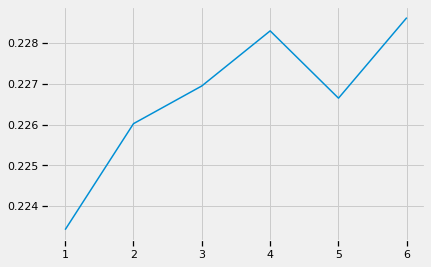

In [77]:
ax = plt.plot(n_ests, n_ests_acc)
ax.set_xlabel('Number of Estimators', fontsize=14)
ax.set_ylabel('Performance', fontsize=14)
plt.show()

In [78]:
def max_features_performance(mf_n):
    '''
    input: number of max features
    output: accuracy of model with n max features
    '''
    model = RandomForestClassifier(n_estimators=3, 
                                   max_features=mf_n,
                                   bootstrap=True,
                                   max_samples=0.75)
    #fit new model
    model.fit(X_train, y_train)
    #performance of the model
    acc = model.score(X_train[0:40000], y_train[0:40000])
    return acc

In [79]:
n_feat = np.arange(0.1, 1.1, 0.1)
n_feat_acc = [max_features_performance(n) for n in n_feat]

AttributeError: 'list' object has no attribute 'set_xlabel'

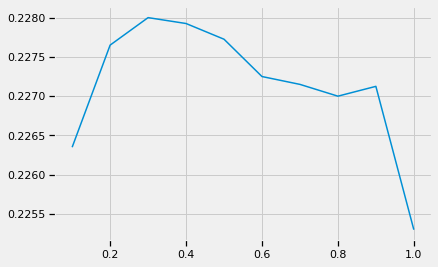

In [80]:
ax = plt.plot(n_feat, n_feat_acc)
ax.set_xlabel('Max Features', fontsize=14)
ax.set_ylabel('Performance', fontsize=14)
plt.show()

In [81]:
def max_samples_performance(mf_n):
    '''
    input: number of max features
    output: accuracy of model with n max features
    '''
    model = RandomForestClassifier(n_estimators=3, 
                                   max_features=0.75,
                                   bootstrap=True,
                                   max_samples=mf_n)
    #fit new model
    model.fit(X_train, y_train)
    #performance of the model
    acc = model.score(X_train[0:100000], y_train[0:100000])
    return acc

In [82]:
n_samp = np.arange(0.1, 1.1, 0.1)
n_samp_acc = [max_samples_performance(n) for n in n_samp]

AttributeError: 'list' object has no attribute 'set_xlabel'

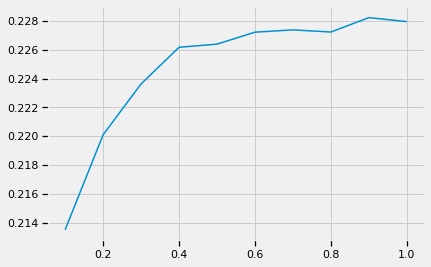

In [83]:
ax = plt.plot(n_samp, n_samp_acc)
ax.set_xlabel('Max Samples', fontsize=14)
ax.set_ylabel('Performance', fontsize=14)
plt.show()

In [84]:
#final model
model = RandomForestClassifier(n_estimators=6, 
                               max_features=0.4,
                               bootstrap=True,
                               max_samples=0.9)
#fit new model
model.fit(X_train, y_train)

RandomForestClassifier(max_features=0.4, max_samples=0.9, n_estimators=6)

In [85]:
#accuracy of the whole training set
friendship_test(X_train, y_train, model) 

0.22842093448328002

In [86]:
#training accuracy of first 100,000
model.score(X_train[0:100000], y_train[0:100000])

0.22924

In [87]:
#testing accuracy of the first 100,000
model.score(X_test[0:100000], y_test[0:100000])

0.21821

In [102]:
destinations = model.predict(X_test[100000:200000])

In [103]:
destination_df = pd.DataFrame({'destinations':destinations})
top5 = destination_df.groupby('destinations').size().sort_values(ascending=False)

In [104]:
top5_values = [i for i in top5[0:5].values]

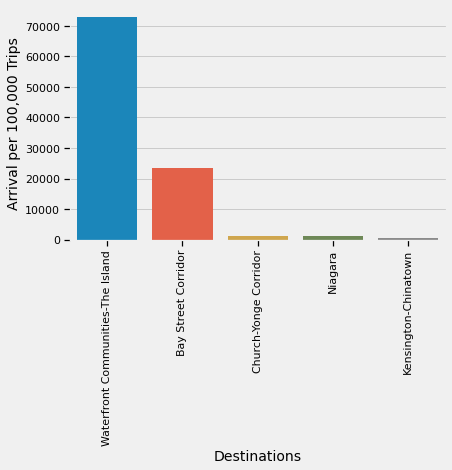

In [105]:
ax = sns.barplot(x = top5[0:5].index, 
                 y = top5_values
                )
ax.set_xlabel('Destinations', fontsize=14)
ax.set_ylabel('Arrival per 100,000 Trips', fontsize=14)
ax.set_xticklabels(ax.get_xticklabels(), rotation=90)
plt.show()

In [ ]:
#can use model to predict whatever
#model.predict(['user type', 'Weather', 'temp', 'start_month', 'start_weekday', 'start_hour']

#annual member in summer at 8 and 9 oclock when temp is 23, no precipitation, on a monday
model.predict([1, 0, 23, 3, 0, 9])